<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: center; position: absolute; right: 20px;color: #0a0a0a; ">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: grey; color: black; padding: 10px;">
    <h4>

<b>AGENDA</b> 

1.  
2.  
3.  
4.  

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Feature Engineering <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">  Encoding, Scaling, Normalization

<div style="background-color: grey; color: black; padding: 10px;">
    <h4><b>Skills Covered</b> <p><p>

- ...

<div style="background-color: grey; color: black; padding: 10px;">
    <h4><b>Learning Outcomes</b> <p><p>

By the end of this lesson, you should be able to:

- Explain what **feature engineering** is and why it matters in ML.
- Identify **categorical** vs **numeric** features.
- Encode categorical variables:
  - **Label encoding** (simple, but use with care)
  - **One-hot encoding** (safer for most ML models)
- Scale numeric features:
  - **Standardization** (mean 0, std 1)
  - **Min–Max scaling** (range 0–1)
- Combine these steps to create a **clean feature matrix** for ML.

**Resources**

- https://www.codecademy.com/learn/paths/fe-path-feature-engineering
- https://www.kaggle.com/learn/feature-engineering
- https://www.featureform.com/post/feature-engineering-guide
- 
- 
-
- 
- 
-
- 
- 
-


We’ll use the `penguins` dataset from `seaborn`:

- Mix of **categorical** features: `species`, `island`, `sex`
- And **numeric** features: bill length, flipper length, body mass

<!-- Link the Montserrat font -->
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@700&display=swap" rel="stylesheet">

<!-- Main div with centered content and a flexible box size, no scroll bar -->
<div style="background-color: #baf733; min-height: 100px; width: 100%; display: flex; justify-content: center; align-items: center; position: relative; padding: 20px; box-sizing: border-box; font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 20px; border-radius: 15px;">
    <div style="position: absolute; top: 10px; right: 10px; padding: 5px 10px; font-size: 14px; color: rgba(0, 0, 0, 0.05); border-radius: 10px;">Mohammad Idrees Bhat</div>
    <!-- Fill the below text with question -->
    <!-- Fill the below text with question -->
    What’s one thing you love doing with your friends?
    <!-- Fill the above text with question -->
    <!-- Fill the above text with question -->

</div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>  What is Feature Engineering? 

It is the process of using domain knowledge to transform raw data into features that make machine learning algorithms work better.

**Feature engineering** = preparing and transforming raw data into a form that is:

- Easier for ML models to understand.
- More informative, so models can learn better.

You can think of it as:

> “Cleaning + transforming columns so the model can do its job well.”


Examples of feature engineering:

- Handling **missing values** (you already learned this).
- **Encoding** categorical variables (text → numbers).
- **Scaling** numerical features (so units don’t dominate).
- Creating new features (ratios, differences, aggregations) – later.

**A. Feature Transformation (Cleaning & Scaling)**

Models are picky about numbers. If one column is "Age" (0–100) and another is "Salary" (0–100,000), the model might think Salary is "more important" just because the numbers are bigger.

- Scaling: Squashing all numbers to fit between 0 and 1.

- Encoding: Changing text (like "Red", "Blue") into numbers (0, 1) because math models can't "read" words.



- https://feaz-book.com/numeric#tbl-feature-scaling

- [One Hot Encoding](https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial)

- 
- [Normalization vs Standardization](https://www.datacamp.com/tutorial/normalization-vs-standardization)

**B. Feature Creation (Adding Intelligence)**

This is where you combine data to create a new, smarter column.

- Example: If you have "Date of Birth," the model might struggle. If you convert that to "Age," the model finds patterns instantly.

- Example: In real estate, instead of just "Square Feet," you might create "Price per Square Foot."



**C. Feature Selection (Reducing Dimensionality)**

As we discussed before, sometimes "less is more." This involves removing features that are redundant or just "noise" (junk data that confuses the model).

Today we focus on:

1. **Encoding** – turning categories (strings) into numbers.  
2. **Scaling/Normalization** – bringing numeric columns to similar ranges.

- https://www.datacamp.com/tutorial/feature-engineering
- 

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>   Categorical vs Numeric Features

- **Numeric features** – numbers where arithmetic makes sense
  - Example: `bill_length_mm`, `flipper_length_mm`, `body_mass_g`, `age`, `salary`

- **Categorical features** – labels/groups
  - Example: `species` (Adelie, Chinstrap, Gentoo)
  - `island` (Biscoe, Dream, Torgersen)
  - `sex` (male, female)

Most ML models **cannot** work directly with text categories –  
we must convert them into numeric form using **encoding**.

In [48]:
# 3. Setup – Import libraries and load dataset

import pandas as pd
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [49]:
# 3.1 Quick info about the dataset

penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We will focus on these columns:

- Categorical: `species`, `island`, `sex`
- Numeric: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>  Encoding Categorical Variables

We’ll look at two simple types:

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   Label Encoding (simple, but risky for some models)

Idea:

- Replace each category with a number:
  - `Adelie` → 0  
  - `Chinstrap` → 1  
  - `Gentoo` → 2

**When is it okay?**

- When there is a **natural order** in categories (e.g., “small < medium < large”).

**Risk:**

- If there is **no real order**, some models may think:
  - `Gentoo (2)` > `Adelie (0)` in a meaningful numeric way.
- This can mislead distance-based models (KNN) or linear models.

We’ll still show it, so students understand it.

In [54]:
# Label encoding 'species' (for demonstration)

# Drop rows with missing species just to be safe
penguins_le = penguins.dropna(subset=["species"]).copy()

In [55]:
# adding a label encoded column
species_codes = {
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}

penguins['species_encoded'] = penguins['species'].map(species_codes) 

penguins_le[["species", "species_encoded"]].head(10)

,species,species_encoded
0,Adelie,0
1,Adelie,0
2,Adelie,0
3,Adelie,0
4,Adelie,0
5,Adelie,0
6,Adelie,0
7,Adelie,0
8,Adelie,0
9,Adelie,0


In [56]:
# same thing using enumerate 
# Create a mapping from species name to integer using enumerate
species_unique = penguins_le["species"].unique()
species_to_int = {name: i for i, name in enumerate(species_unique)}
species_to_int

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

In [57]:
# Apply the mapping

penguins_le["species_label"] = penguins_le["species"].map(species_to_int)
penguins_le[["species", "species_label"]].head(10)


,species,species_label
0,Adelie,0
1,Adelie,0
2,Adelie,0
3,Adelie,0
4,Adelie,0
5,Adelie,0
6,Adelie,0
7,Adelie,0
8,Adelie,0
9,Adelie,0


using the **Category** method

- [Understand Data Types in Pandas Dataframe](https://medium.com/@amit25173/understanding-pandas-dataframe-dtypes-0a2f75eb8a38)
- [Datatypes](https://www.sparkcodehub.com/pandas/basics/understanding-datatypes)

In [58]:
# another way
# Most memory-efficient way if you are already using Category dtypes

# Convert to category type
penguins_le['species'] = penguins_le['species'].astype('category')
# Use the 'cat.codes' to get the numbers
penguins_le['species_cat_codes'] = penguins_le['species'].cat.codes
penguins_le

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,species_label,species_cat_codes
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2,2,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2,2,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2,2,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2,2,2


In [59]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
encoder = LabelEncoder()





> “We converted text labels to integers.  
> But the numbers 0, 1, 2 **do not really mean** better/worse – they are just IDs.”

For most general ML tasks with non-ordered categories,  
we prefer **one-hot encoding**.


Idea:

- Create one new column per category.
- Use 0/1 to indicate presence.

Example for `species`:

Original:

| species   |
|----------|
| Adelie   |
| Gentoo   |
| Chinstrap|

After one-hot:

| species_Adelie | species_Gentoo | species_Chinstrap |
|----------------|----------------|-------------------|
| 1              | 0              | 0                 |
| 0              | 1              | 0                 |
| 0              | 0              | 1                 |

No fake ordering between categories.

We can do this easily with `pandas.get_dummies`.

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   One-Hot Encoding (recommended for most models)

- https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/


In [60]:
# 3.2 One-hot encoding 'species', 'island', 'sex'

# First, select subset of columns we care about
cols = ["species", "island", "sex",
        "bill_length_mm", "bill_depth_mm",
        "flipper_length_mm", "body_mass_g"]

penguins_sub = penguins[cols].dropna()  # drop rows with any missing value for simplicity

penguins_sub.head()


,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,Male,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,Female,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,Female,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,Female,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,Male,39.3,20.6,190.0,3650.0


In [61]:
# Use get_dummies for one-hot encoding categorical columns
# drop_first=True drops one category per feature to avoid perfect multicollinearity (optional)

penguins_encoded = pd.get_dummies(
    penguins_sub,
    columns=["species", "island", "sex"],
    drop_first=False  # keep all for learning; can switch to True later
)

penguins_encoded.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


In [62]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Setup Data
data = [['Red'], ['Blue'], ['Green']]
df = pd.DataFrame(data, columns=['Color'])

# 2. Initialize (sparse_output=False makes it easy to read as an array)
ohe = OneHotEncoder(sparse_output=False)

# 3. Transform
encoded_data = ohe.fit_transform(df[['Color']])

# 4. See the result
# It created 3 columns!
print(encoded_data)



[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [63]:
df[['1','2','3']] = encoded_data
df

,Color,1,2,3
0,Red,0.0,0.0,1.0
1,Blue,1.0,0.0,0.0
2,Green,0.0,1.0,0.0


Now all the categorical columns (`species`, `island`, `sex`) have been turned into multiple 0/1 columns.

You can point out to students:

- Column names like `species_Adelie`, `island_Biscoe`, `sex_male`.
- Rows have 1 in exactly one species column, 1 in exactly one island column, etc.


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   Scaling & Normalizing Numeric Features

In [64]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Raw data: Age vs. Yearly Income
data = pd.DataFrame({
    'age': [20, 50, 100],
    'income': [20000, 50000, 100000]
})

# Initialize the Scaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(data)

# Turn back into a DataFrame to see the 0-1 range
df_norm = pd.DataFrame(normalized_data, columns=['age', 'income'])

df_norm

,age,income
0,0.000,0.000
1,0.375,0.375
2,1.000,1.000


Why do we need scaling?

Consider a dataset with:

- `bill_length_mm` ≈ 30–60
- `body_mass_g` ≈ 3000–6000

Some models (KNN, K-Means, gradient-based models) are sensitive to **feature scales**:

- A feature with large values can **dominate** distance calculations.
- Scaling puts features on **similar ranges**, helping models treat them more fairly.

Models like Linear Regression or Neural Networks use math to find the "bottom of a hill" (Gradient Descent). If one variable is huge and another is tiny, the "hill" is shaped like a long, skinny canyon. The model will bounce back and forth and take forever to find the bottom. Normalization makes the hill a perfect bowl, so the model slides straight to the answer.



Two common approaches:

1. **Standardization** – mean 0, standard deviation 1  
2. **Min–Max scaling** – values between 0 and 1

> In many ML libraries, “normalize” is sometimes used loosely for scaling.  
> To keep it simple, we’ll treat:
> - **StandardScaler** as “standardization”
> - **MinMaxScaler** as “normalization to [0, 1]”

In [65]:
# 4.1 Separate numeric and categorical columns after encoding

# In penguins_encoded, categorical have prefixes 'species_', 'island_', 'sex_'
numeric_cols = ["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm", "body_mass_g"]

categorical_cols = [col for col in penguins_encoded.columns
                    if col not in numeric_cols]

numeric_data = penguins_encoded[numeric_cols]
categorical_data = penguins_encoded[categorical_cols]

numeric_data.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>  Standardization (StandardScaler)

Standardization: for each numeric feature:


z = {x -mean} / std


- **Mean** becomes 0
- **Standard deviation** becomes 1
- Values typically in range ≈ -3 to +3

We’ll use `sklearn.preprocessing.StandardScaler`.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_scaled = scaler.fit_transform(numeric_data)

# Turn back into DataFrame for easy viewing
numeric_scaled_df = pd.DataFrame(
    numeric_scaled,
    columns=[col + "_std" for col in numeric_cols]
)

numeric_scaled_df.head()


,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


Each standardized column:

- Has mean ~ 0
- Has standard deviation ~ 1

We can check quickly:


In [67]:
numeric_scaled_df.describe().round(2)


,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
count,333.00,333.00,333.00,333.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.18,-2.07,-2.07,-1.87
25%,-0.82,-0.80,-0.78,-0.82
50%,0.09,0.07,-0.28,-0.20
75%,0.84,0.78,0.86,0.71
max,2.86,2.20,2.15,2.60


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   Min–Max Scaling (0–1 Normalization)

Another very common scaling:


x_scaled = {x - min} / {max - min}


- Minimum becomes 0
- Maximum becomes 1
- All values in [0, 1]

We use `MinMaxScaler`.

In [68]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

numeric_minmax = minmax_scaler.fit_transform(numeric_data)

numeric_minmax_df = pd.DataFrame(
    numeric_minmax,
    columns=[col + "_minmax" for col in numeric_cols]
)

numeric_minmax_df.head()


,bill_length_mm_minmax,bill_depth_mm_minmax,flipper_length_mm_minmax,body_mass_g_minmax
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889


In [69]:
# Check range (should be between 0 and 1)
numeric_minmax_df.describe().round(2)


,bill_length_mm_minmax,bill_depth_mm_minmax,flipper_length_mm_minmax,body_mass_g_minmax
count,333.00,333.00,333.00,333.00
mean,0.43,0.48,0.49,0.42
std,0.20,0.23,0.24,0.22
min,0.00,0.00,0.00,0.00
25%,0.27,0.30,0.31,0.24
50%,0.45,0.50,0.42,0.38
75%,0.60,0.67,0.69,0.58
max,1.00,1.00,1.00,1.00


You can ask students:

- When might we prefer **standardization**?  
  → Many ML algorithms, especially if data is roughly normal.

- When might we prefer **min–max scaling**?  
  → When we want everything exactly between 0 and 1 (e.g., neural nets, some distance-based methods).


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>  Putting It All Together – Final Feature Matrix for ML

Let’s build a final **feature matrix** that:

- Uses **one-hot encoded** categorical variables
- Uses **scaled numeric** variables

We’ll choose **standardized** numeric features for this example.

In [70]:
# 5.1 Combine standardized numeric features + categorical one-hot columns

# numeric_scaled_df has standardized numeric columns
# categorical_data has one-hot columns already

X_final = pd.concat(
    [numeric_scaled_df.reset_index(drop=True),
     categorical_data.reset_index(drop=True)],
    axis=1
)

X_final.head()


,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,True,False,False,False,False,True,False,True
1,-0.822788,0.119584,-1.069474,-0.506286,True,False,False,False,False,True,True,False
2,-0.676280,0.424729,-0.426373,-1.190361,True,False,False,False,False,True,True,False
3,-1.335566,1.085877,-0.569284,-0.941606,True,False,False,False,False,True,True,False
4,-0.859415,1.747026,-0.783651,-0.692852,True,False,False,False,False,True,False,True


In [71]:
# 5.2 Check shape and columns

print("Final feature matrix shape:", X_final.shape)
X_final.columns


Final feature matrix shape: (333, 12)


Index(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
       'body_mass_g_std', 'species_Adelie', 'species_Chinstrap',
       'species_Gentoo', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_Female', 'sex_Male'],
      dtype='object')

This `X_final` is now:

- All **numeric**
- All features scaled and encoded
- Ready to be used as input to most ML models

In a real ML pipeline, we would pair this with a **target** (label), e.g. `species_name`, and train a classifier.


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>  Quick Classification: Predict Species

Just to show how this connects to ML, let’s:

- Use `X_final` as features
- Use `species_name` as target
- Train a simple **Logistic Regression** or **RandomForestClassifier**

*(We’ll keep it very short and simple – the main focus today is feature engineering.)*

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Target: species_name (string labels)
y = penguins_sub["species"]  # same rows as used in penguins_encoded

# Use standardized numeric + one-hot categorical
X = X_final

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Simple Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy with engineered features: {acc:.3f}")


Accuracy with engineered features: 1.000


You can now connect back to ML Foundations:

> “See how we used **feature engineering** to create a clean numeric matrix?  
> That’s what we feed into the model. Good features often matter more than a fancy algorithm.”


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>  Summary

You should now understand:

- What **feature engineering** is and why it is crucial for ML.
- The difference between **categorical** and **numeric** features.
- How to encode categorical variables:
  - **Label encoding** (simple ID mapping, but be careful with fake ordering)
  - **One-hot encoding** (recommended for nominal categories)
- How to scale numeric features:
  - **Standardization** (mean 0, std 1) with `StandardScaler`
  - **Min–Max scaling** (0–1 range) with `MinMaxScaler`
- How to combine encoded + scaled features into a single **feature matrix** ready for ML models.

This sets you up for:

- Better-performing models
- More stable training (especially for distance-based or gradient-based models)
- More professional ML pipelines in upcoming modules.

<div class="alert alert-block alert-warning">
    <b><font size="5"> Live Exercise</font> </b>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

Now it's your turn!
#### Exercise 1 - One-Hot Encode Another Dataset

Use the `tips` dataset:

1. Load `tips` from seaborn.
2. One-hot encode `day`, `time`, `sex`, and `smoker`.
3. Check how many new columns were created.



#### Exercise 2 – Compare Standard vs Min–Max

1. For `penguins` numeric columns, compute:
   - Standardized version
   - Min–max scaled version
2. For a single column (e.g. `bill_length_mm`), plot histograms for:
   - Original
   - Standardized
   - Min–max

How do their **ranges** and **shapes** differ?



<div style="background-color: lightblue; color: white; padding: 10px; text-align: center;">
    <h1>_________________________________END________________________________
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: #002147; color: #fff; padding: 30px; text-align: center;">
    <h1>THANK YOU!
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h4> Live Exercise Solutions
        
</h4> </div>

#### Task 1 solution

In [ ]:
# Task 1 – One-Hot Encode Another Dataset (tips)

import seaborn as sns
import pandas as pd

# 1) Load tips
tips = sns.load_dataset("tips")

# 2) One-hot encode day, time, sex, smoker
cat_cols = ["day", "time", "sex", "smoker"]
tips_encoded = pd.get_dummies(tips, columns=cat_cols, drop_first=False)

# 3) Check how many new columns were created
new_cols_created = tips_encoded.shape[1] - tips.shape[1]

print("Original tips shape:", tips.shape)
print("Encoded tips shape :", tips_encoded.shape)
print("New columns created:", new_cols_created)

# (Optional) See which columns were added
added_columns = [c for c in tips_encoded.columns if c not in tips.columns]
print("\nAdded columns:")
print(added_columns)


Original tips shape: (244, 7)
Encoded tips shape : (244, 13)
New columns created: 6

Added columns:
['day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No']


#### Task 2 solution

In [ ]:
# Task 2 – Compare Standard vs Min–Max (penguins)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1) Load penguins
penguins = sns.load_dataset("penguins")

# 2) Select numeric columns and drop missing values for scaling
num_cols = penguins.select_dtypes(include="number").columns.tolist()
peng_num = penguins[num_cols].dropna()

print("Numeric columns:", num_cols)
print("Rows used for scaling:", peng_num.shape[0])

# Standardized version
std_scaler = StandardScaler()
peng_standardized = pd.DataFrame(
    std_scaler.fit_transform(peng_num),
    columns=num_cols,
    index=peng_num.index
)

# Min–max scaled version
mm_scaler = MinMaxScaler()
peng_minmax = pd.DataFrame(
    mm_scaler.fit_transform(peng_num),
    columns=num_cols,
    index=peng_num.index
)

# Quick check
print("\nStandardized summary (mean ~0, std ~1):")
print(peng_standardized.describe().loc[["mean", "std"]])

print("\nMin–Max summary (min=0, max=1):")
print(peng_minmax.describe().loc[["min", "max"]])



Numeric columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Rows used for scaling: 342

Standardized summary (mean ~0, std ~1):
      bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
mean    1.662088e-16  -1.412775e-15      -8.310441e-16  4.155221e-17
std     1.001465e+00   1.001465e+00       1.001465e+00  1.001465e+00

Min–Max summary (min=0, max=1):
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
min             0.0            0.0                0.0          0.0
max             1.0            1.0                1.0          1.0


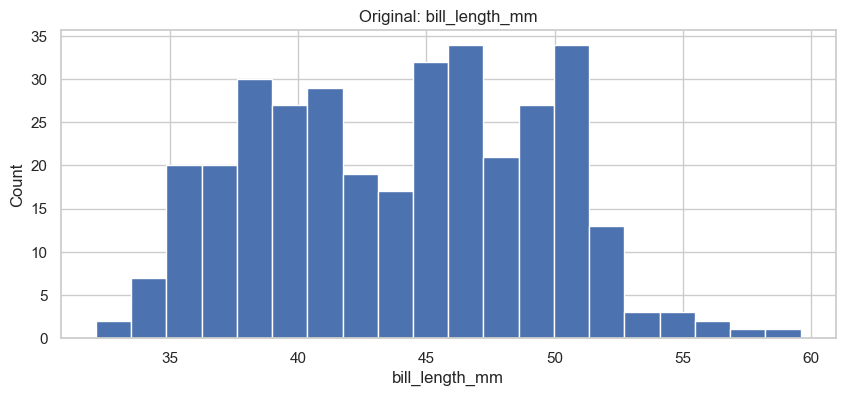

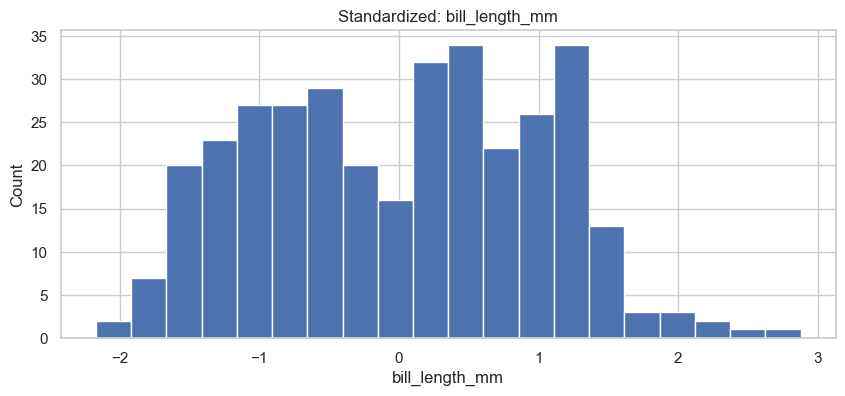

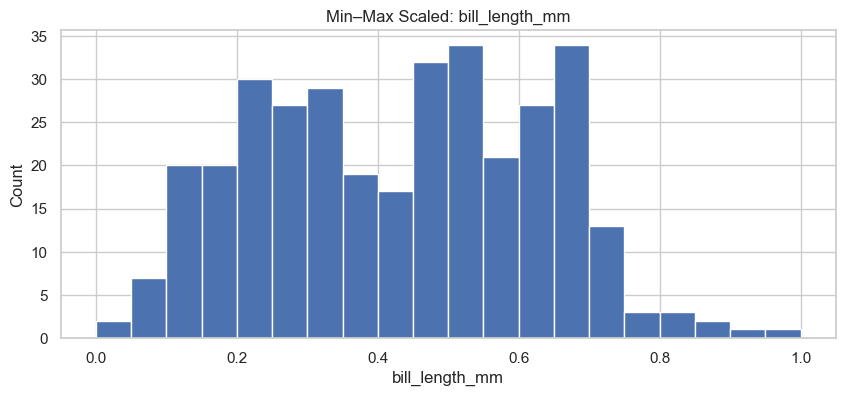

In [ ]:
# Plot histograms for one column: original vs standardized vs min–max

col = "bill_length_mm"  # you can change this

plt.figure(figsize=(10, 4))
plt.hist(peng_num[col], bins=20)
plt.title(f"Original: {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(peng_standardized[col], bins=20)
plt.title(f"Standardized: {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(peng_minmax[col], bins=20)
plt.title(f"Min–Max Scaled: {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


<!--- Mohammad Idrees Bhat | Mohammad Idrees Bhat --->

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->